In [7]:
pip install pandas matplotlib seaborn geopandas folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.4/338.4 kB 813.7 kB/s eta 0:00:00 eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 851.5 kB/s eta 0:00:001m910.7 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.7/27.7 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 948.7 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 628.9 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 1.1 MB/s eta 0:00:00 MB/s eta 0:00:01m

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

In [12]:
df = pd.read_csv('data/nyc_911_clean.csv')
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10123 entries, 0 to 10122
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Incident Type  10123 non-null  object 
 1   Location       9986 non-null   object 
 2   Borough        10123 non-null  object 
 3   Creation Date  10123 non-null  object 
 4   Closed Date    7433 non-null   object 
 5   Latitude       10123 non-null  float64
 6   Longitude      10123 non-null  float64
 7   Hour           10123 non-null  int64  
 8   DayOfWeek      10123 non-null  object 
 9   Month          10123 non-null  object 
 10  IsWeekend      10123 non-null  bool   
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 800.9+ KB
None
Incident Type       0
Location          137
Borough             0
Creation Date       0
Closed Date      2690
Latitude            0
Longitude           0
Hour                0
DayOfWeek           0
Month               0
IsWeekend           0

In [ ]:
# Temporal EDA - to understand when emergencies happen

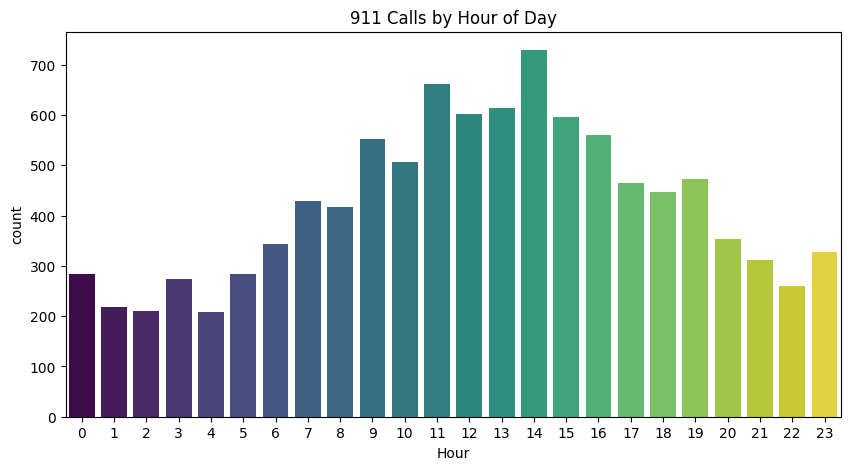

In [15]:
# Calls per Hour 

plt.figure(figsize=(10,5))
sns.countplot(x='Hour', hue='Hour', data=df, palette='viridis', legend=False)
plt.title('911 Calls by Hour of Day')
plt.show()

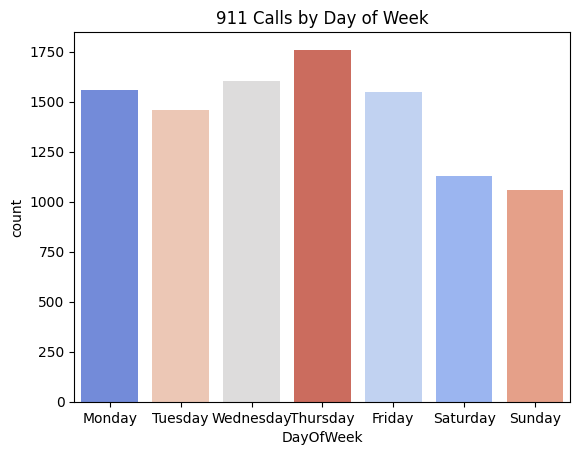

In [19]:
# Calls per day of the Week

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(x='DayOfWeek', hue='DayOfWeek', data=df, order=order, palette='coolwarm', legend=False)
plt.title('911 Calls by Day of Week')
plt.show()

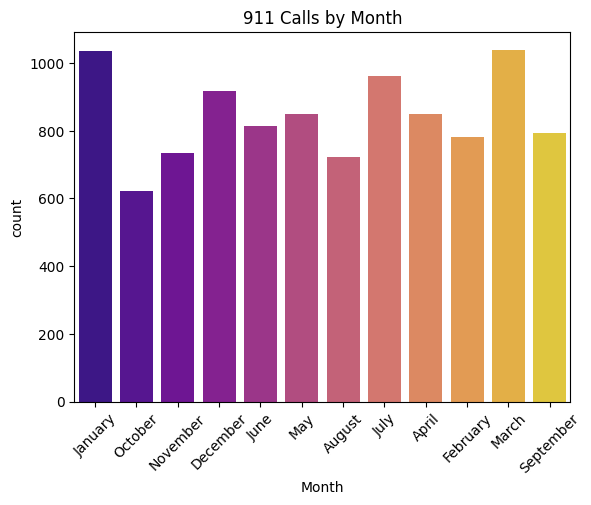

In [20]:
# Calls per Month

sns.countplot(x='Month', hue='Month', data=df, palette='plasma', legend=False)
plt.xticks(rotation=45)
plt.title('911 Calls by Month')
plt.show()

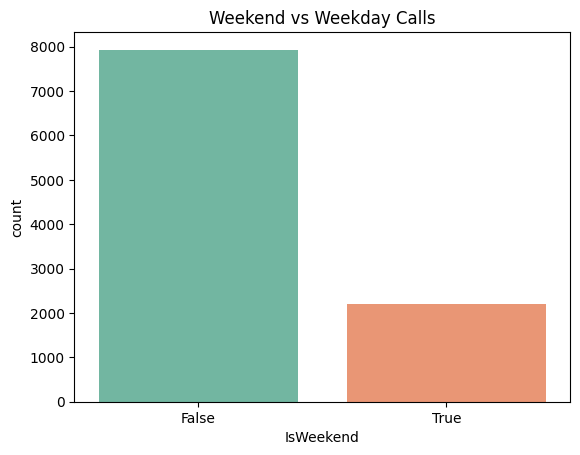

In [21]:
# Weekend vs Weekday

sns.countplot(x='IsWeekend', hue='IsWeekend', data=df, palette='Set2', legend=False)
plt.title('Weekend vs Weekday Calls')
plt.show()


In [ ]:
# Spatial EDA - to understand where the emergencies happen

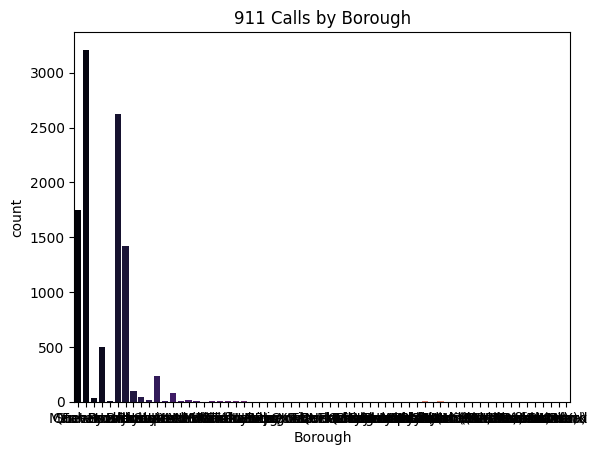

In [22]:
# Calls by Borough

sns.countplot(x='Borough', hue='Borough', data=df, palette='magma', legend=False)
plt.title('911 Calls by Borough')
plt.show()

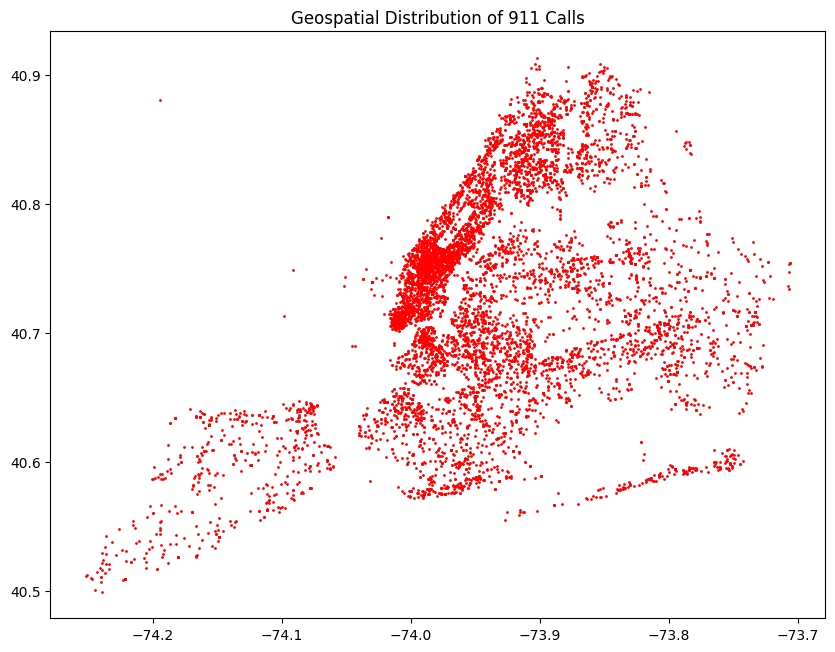

In [23]:
# Mapping Cells (Static Overview)

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf.plot(figsize=(10,10), markersize=1, color='red')
plt.title('Geospatial Distribution of 911 Calls')
plt.show()

In [25]:
# Interactive Map (Folium)

m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)
for _, row in df.sample(500).iterrows():  # sample to avoid overload
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                        radius=2,
                        color='blue',
                        fill=True).add_to(m)
m.save('data/911_calls_map.html')

In [ ]:
# Spatio Temporal Cross Analysis - Link time trends to location patterns

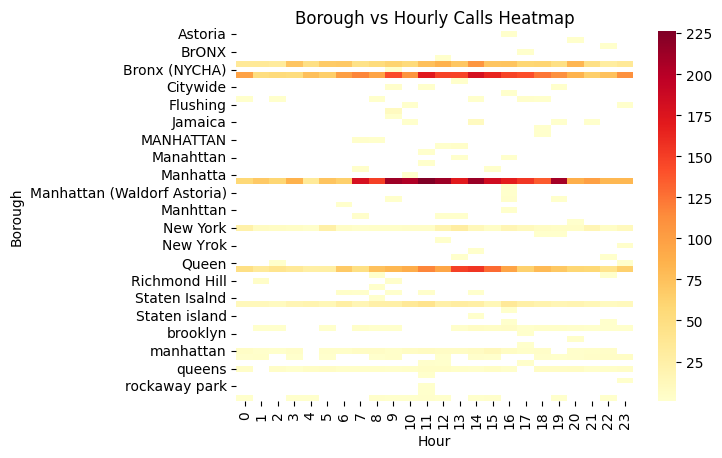

In [26]:
# Heatmap for Borough vs Hour

heat_data = df.groupby(['Borough','Hour']).size().reset_index(name='Count')
pivot_data = heat_data.pivot(index='Borough', columns='Hour', values='Count')
sns.heatmap(pivot_data, cmap='YlOrRd')
plt.title('Borough vs Hourly Calls Heatmap')
plt.show()


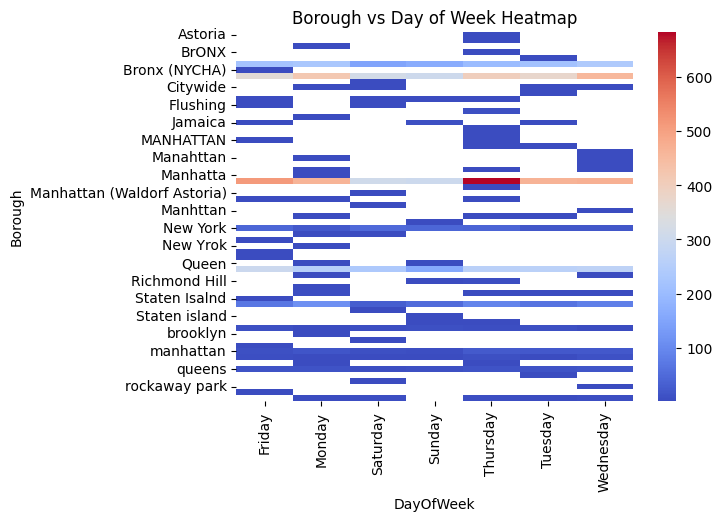

In [27]:
# Heatmmap for Borough vs Day of the Week

heat_data = df.groupby(['Borough','DayOfWeek']).size().reset_index(name='Count')
pivot_data = heat_data.pivot(index='Borough', columns='DayOfWeek', values='Count')
sns.heatmap(pivot_data, cmap='coolwarm')
plt.title('Borough vs Day of Week Heatmap')
plt.show()

In [ ]:
# Incident Type Analysis

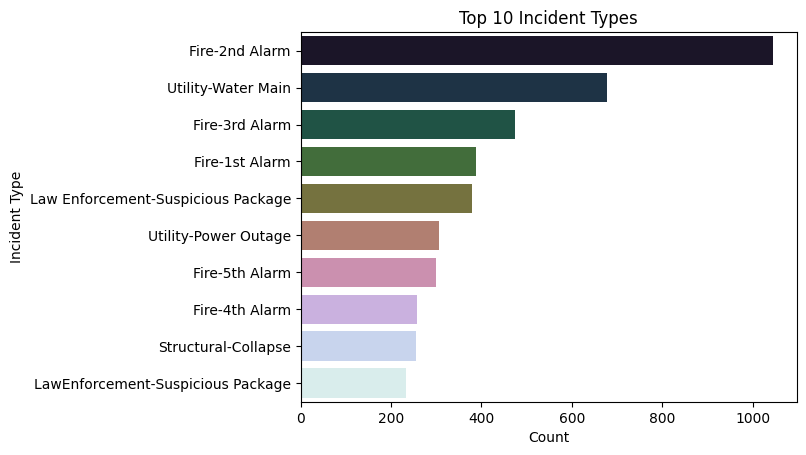

In [29]:
# Top 10 incident types

top_incidents = df['Incident Type'].value_counts().head(10)
sns.barplot(y=top_incidents.index, hue=top_incidents.index, x=top_incidents.values, palette='cubehelix', legend=False)
plt.title('Top 10 Incident Types')
plt.xlabel('Count')
plt.ylabel('Incident Type')
plt.show()

In [ ]:
# Anomaly Detection - Spot outliers in calls per day

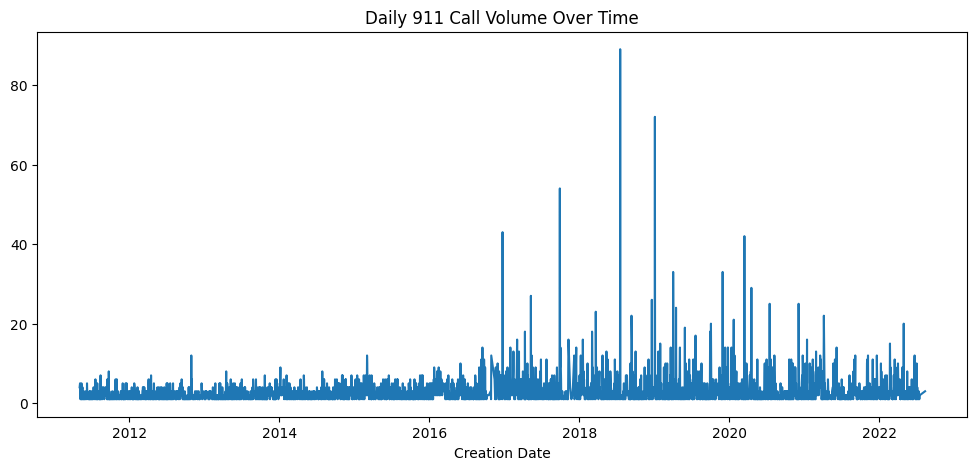

In [30]:
df['Creation Date'] = pd.to_datetime(df['Creation Date'])
daily_counts = df.groupby(df['Creation Date'].dt.date).size()
daily_counts.plot(figsize=(12,5))
plt.title('Daily 911 Call Volume Over Time')
plt.show()

In [32]:
df = pd.read_csv('data/nyc_911_features.csv')
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10123 entries, 0 to 10122
Columns: 479 entries, Location to borough_staten island
dtypes: bool(463), float64(4), int64(7), object(5)
memory usage: 5.7+ MB
None
Location                  137
Creation Date               0
Closed Date              2690
Latitude                    0
Longitude                   0
                         ... 
borough_quenns              0
borough_rockaway            0
borough_rockaway park       0
borough_staten Island       0
borough_staten island       0
Length: 479, dtype: int64
